In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

## 1) Fischer Score (Chi square Implementation) 

It is the chi-square implementation in scikit-learn. It computes chi-squared stats between each non-negative feature and class.

This score should be used to evaluate categorical variables in a classification task. It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

In [2]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [3]:
iris = load_iris()
X = iris.data 
y = iris.target 

In [4]:
chi2_selector = SelectKBest(chi2, k=2)

In [5]:
X_kbest = chi2_selector.fit_transform(X, y)

### Follow the given page to learn completely about Chi-2 Test 

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

## 2) ANOVA F-values   

if the features are quantitative, we will compute the ANOVA F-value between each feature and the target vector.
<br>
The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

For complete Analysis of this method check this link -> 
<br>
https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476

In [7]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [8]:
iris = load_iris()
X = iris.data 
y = iris.target 

In [10]:
fvalue_selector = SelectKBest(f_classif, k=2)
X = fvalue_selector.fit_transform(X,y)

## 3) Correlation Matrix with HeatMap  

Correlation is the measure of Linear Dependency of 2 variable or more . Using Correlation we can predict a variable from other <br>
Good variables should be highly correlated with the target values 
<br>
<br>
Variables should be correlated with the target but uncorrelated among themselves.
<br>


Using Pearson correlation our returned coefficient values will vary between -1 and 1.
<br><br>
If the correlation between two features is 0 this means that changing any of these two features will not affect the other.
<br><br>
If the correlation between two features is greater than 0 this means that increasing the values in one feature will make increase also the values in the other feature (the closer the correlation coefficient is to 1 and the stronger is going to be this bond between the two different features).
<br><br>
If the correlation between two features is less than 0 this means that increasing the values in one feature will make decrease the values in the other feature (the closer the correlation coefficient is to -1 and the stronger is going to be this relationship between the two different features).
<br><br>
In this analysis we will check if the selected variables are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others.

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [12]:
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [13]:
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


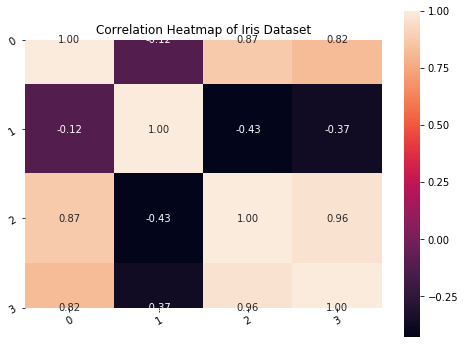

In [14]:
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()    

In [15]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper    

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [16]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[3]


In [17]:
# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)

       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]
